### 1. Bies в композиции деревьев
### Пусть $E(y - a_m(x)) = 0 \forall m$, $E(y - a_1(x))^2 = \sigma^2$, тогда
### $E(y - a_k(x))\cdot(y - a_m(x)) = E(y - a_k(x))\cdot E(y - a_m(x)) = 0$
### Рассмотрим $E(y - \frac{1}{M}\sum_{k=1}^{M}{a_k(x)})^2 = E(\frac{1}{M^2}\sum_{k=1}^{M}{(y - a_k(x))})^2 = \frac{\sigma^2}{M}$ 

### 2. Variance в скоррелированных деревьях
### Пусть $a_{x^l} = \frac{1}{M}\sum_{m=1}^M{a_{x^l, m}(x)}$, тогда
### $Variance = E_{xy}E_{x^l}\large(\frac{1}{M}\sum_{m=1}^M{a_{x^l, m}(x)} - E_{x^l}\frac{1}{M} \sum_{m=1}^M{a_{x^l, m}(x)}\large)^2 = \frac{1}{M^2}\sum_{m=1}^M E_{xy} E_{x^l} \large(\sum_{m=1}^M{a_{x^l, m}(x)} - E_{x^l}\sum_{n=1}^M{a_{x^l, n}(x)} = \frac{1}{M^2} (\sum_{m=n}(...) + \sum_{m \ne n}(...)) = \frac{1}{M^2}(Variance(tree) + Correlation)$
### то есть при уменьшении корреляции деревьев $Variance$ ансамбля уменьшается.

In [1]:
from sklearn import ensemble , cross_validation, learning_curve, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb
%pylab inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
bioresponce = pd.read_csv('train.csv', header=0, sep=',')
bioresponce.head()


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:, 1:]
n_trees = [1] + range(10, 100, 5)

In [4]:
def buildGraphics(n_trees, scoring, xgb_scoring):
    pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
    pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
    pylab.grid(True)
    pylab.xlabel('n_trees')
    pylab.ylabel('score')
    pylab.title('Accuracy score')
    pylab.legend(loc='lower right')

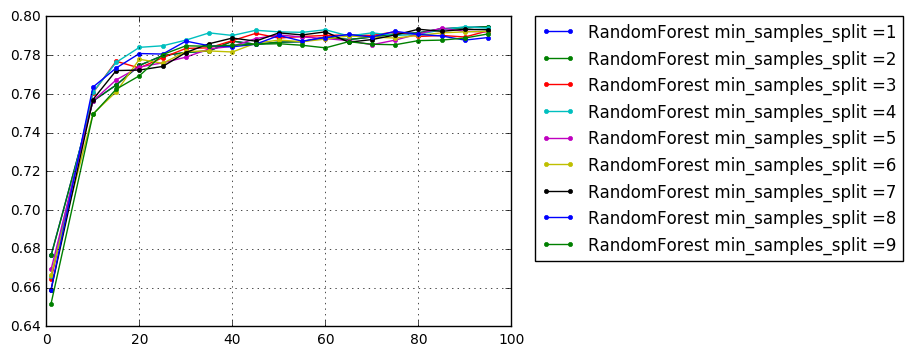

In [6]:
for i in range(1, 10):
    scoring = []
    for n_tree in n_trees:
        estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=i, random_state=1)
        score = cross_validation.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                                 scoring = 'accuracy', cv = 3)    
        scoring.append(score)
    scoring = np.asmatrix(scoring)
    st = 'RandomForest min_samples_split =' + str(i)
    pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label=st)
pylab.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.grid(True)

Увеличим learning_rate


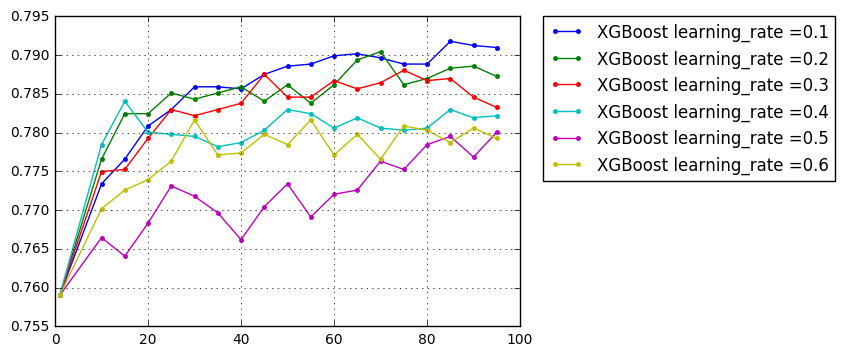

In [8]:
print "Увеличим learning_rate"
learning = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for i in learning:
    xgb_scoring = []
    for n_tree in n_trees:
        estimator = xgb.XGBClassifier(learning_rate=i, max_depth=5, n_estimators=n_tree, min_child_weight=3)
        score = cross_validation.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                                 scoring = 'accuracy', cv = 3)    
        xgb_scoring.append(score)
    xgb_scoring = np.asmatrix(xgb_scoring)
    st = 'XGBoost learning_rate =' + str(i)
    pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label=st)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.grid(True)

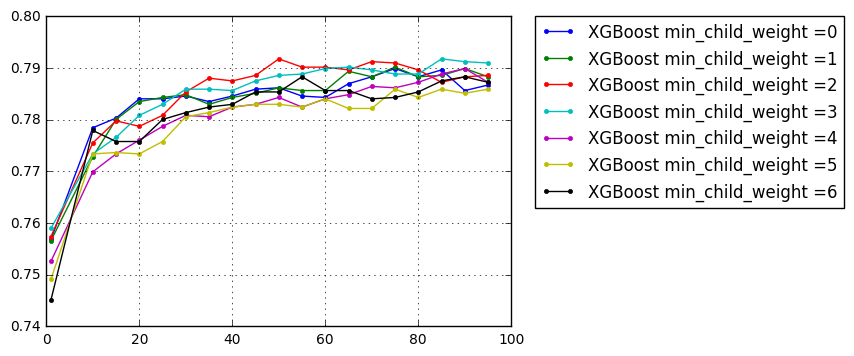

In [9]:
for i in range(0, 7):
    xgb_scoring = []
    for n_tree in n_trees:
        estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=i)
        score = cross_validation.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                                 scoring = 'accuracy', cv = 3)    
        xgb_scoring.append(score)
    xgb_scoring = np.asmatrix(xgb_scoring)
    st = 'XGBoost min_child_weight =' + str(i)
    pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label=st)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.grid(True)

Видно, что различные значения min_child_weight  дают примерно одинаковый результат accuracy, однако можно выделить эестремум качества при min_child_weight ~ 2-3.

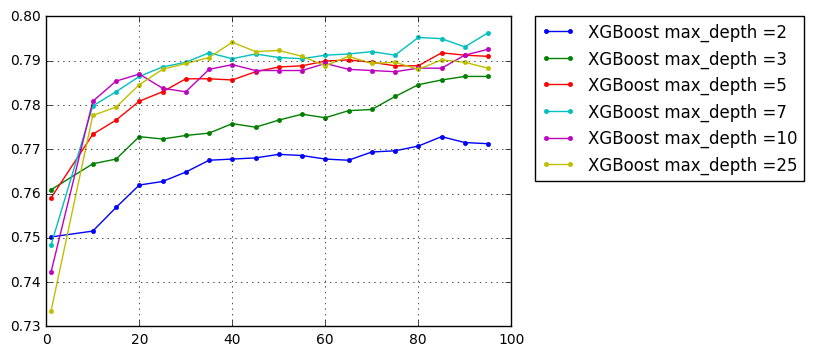

In [10]:
depth = [2, 3, 5, 7, 10, 25]
for i in depth:
    xgb_scoring = []
    for n_tree in n_trees:
        estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=i, n_estimators=n_tree, min_child_weight=3)
        score = cross_validation.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                                 scoring = 'accuracy', cv = 3)    
        xgb_scoring.append(score)
    xgb_scoring = np.asmatrix(xgb_scoring)
    st = 'XGBoost max_depth =' + str(i)
    pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label=st)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.grid(True)

Видно, что с увеличением максимальной допустимой глубины дерева качество сначала увеличивается довольно сильно, но впоследствие выходит на плато, достигая accuracy = 0.8, но не переобучаясь.